### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from assignment1 import plot_clusters, EM_kmeans, save_plots_pdf

In [64]:
mean = [[2,2], [8,3], [3,6]]
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]
n = 200

X0 = np.random.multivariate_normal(mean[0], cov1, n)
X1 = np.random.multivariate_normal(mean[1], cov1, n)
X2 = np.random.multivariate_normal(mean[2], cov2, n)

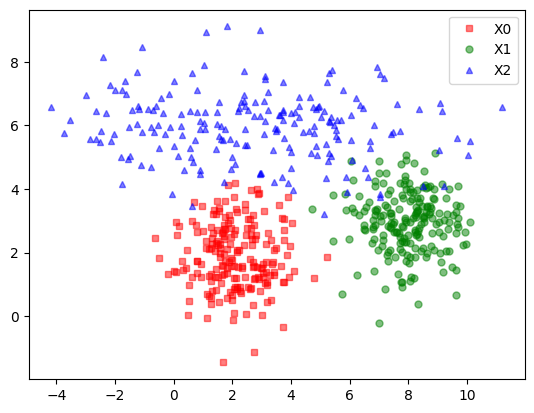

In [65]:
X = np.vstack((X0, X1, X2))
original_label = np.array([0]*n + [1]*n + [2]*n)
orignial_fig = plot_clusters(X, original_label) 

In [66]:
K = 3
centroids, labels, i = EM_kmeans(X, K)

In [67]:
print(f'X[0]: mean = {mean[0]}, cov = {cov1}, n = {n}')
print(f'X[1]: mean = {mean[1]}, cov = {cov1}, n = {n}')
print(f'X[2]: mean = {mean[2]}, cov = {cov2}, n = {n}')

print(f'\nCentroids after {i} iterations: \n', centroids)

X[0]: mean = [2, 2], cov = [[1, 0], [0, 1]], n = 200
X[1]: mean = [8, 3], cov = [[1, 0], [0, 1]], n = 200
X[2]: mean = [3, 6], cov = [[10, 0], [0, 1]], n = 200

Centroids after 7 iterations: 
 [[7.7226717  3.4803216 ]
 [2.10585362 1.91822166]
 [1.34727439 6.11200645]]


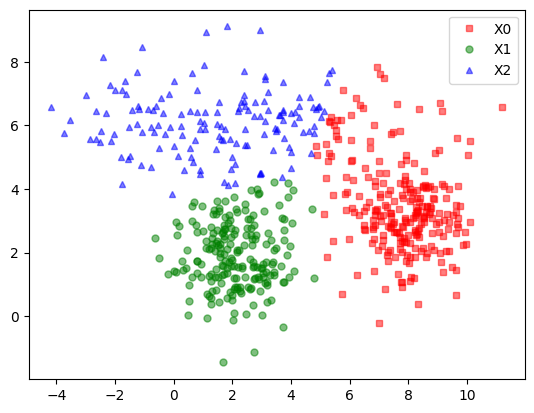

In [68]:
last_fig = plot_clusters(X, labels[-1])

In [69]:
save_plots_pdf(X, labels, 'assignment3')

Saved plots to assignment3.pdf


- ### Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

**Ảnh hướng của phân phối $\mathcal{N}((3, 6), \Sigma_2)$ lên K-means:**

- Lớn về phương sai: so với cov1 thì cov2 có phương sai lớn dọc theo trục x = dữ liệu phân bố rất rộng -> centroid cụm bị kéo về phía các điểm xa hơn
- Khó phân biệt cụm: do phân bố rộng nên các điểm ở rìa có thể gần các cụm khác -> giảm độ chính xác 
- Ảnh hưởng hội tụ: cụm có phương sai lớn làm K-means hội tụ chậm hơn hoặc rơi vào các cực tiểu cục bộ do các centroid di chuyển nhiều hơn qua các vòng lặp
- Không phù hợp k-means: k-means giả định các cụm dạng hình cầu (như cov1) với phương sai tương đối đồng đều

**Trong trường hợp này**

Centroids after 7 iterations: 
- [[7.72, 3.48],   (8, 3) lệch nhẹ
- [2.10, 1.91],    (2, 2) lệch nhẹ
- [1.35, 6.11]]    (3, 6) bị kéo hẳn sang trái do phương sai lớn